<a href="https://colab.research.google.com/github/pyratlib/pyrat/blob/main/PyRAT_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyRAT user example

This notebook has examples of using the library to extract metrics and use electrophysiological data. The data is stored on our GitHub (pyrat>docs>Data.rar).

Sections <a name="manipulations"></a>:


1.   [Data manipulation](#manipulations)
2.   [Graphics and metrics](#graph)
3.   [Electophysiology](#electophysiology)
4.   [Classify Behavior](#t-sne)


For more details: https://github.com/pyratlib/pyrat

In [1]:
#@title Installing PyRAT and downloading data.
!pip install pyratlib
!pip install wget
!pip install unrar
!git clone 
!wget https://zenodo.org/record/5522145/files/PyRAT_dataset.rar?download=1
!unrar x "/content/PyRAT_dataset.rar?download=1"
!git clone https://github.com/pyratlib/pyrat/

import pyratlib as rat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from IPython.display import clear_output 

clear_output()

In [2]:
#@title Load data

# Rato 1
df1_1 = pd.read_csv('/content/PyRAT_dataset/R1D1.csv')
df1_2 = pd.read_csv('/content/PyRAT_dataset/R1D2.csv')
df1_3 = pd.read_csv('/content/PyRAT_dataset/R1D3.csv')

# Rato 2
df2_1 = pd.read_csv('/content/PyRAT_dataset/R2D1.csv')
df2_2 = pd.read_csv('/content/PyRAT_dataset/R2D2.csv')
df2_3 = pd.read_csv('/content/PyRAT_dataset/R2D3.csv')

# Rato 3
df3_1 = pd.read_csv('/content/PyRAT_dataset/R3D1.csv')
df3_2 = pd.read_csv('/content/PyRAT_dataset/R3D2.csv')
df3_3 = pd.read_csv('/content/PyRAT_dataset/R3D3.csv')

# Rato 4
df4_1 = pd.read_csv('/content/PyRAT_dataset/R4D1.csv')
df4_2 = pd.read_csv('/content/PyRAT_dataset/R4D2.csv')
df4_3 = pd.read_csv('/content/PyRAT_dataset/R4D3.csv')

# Rato 5
df5_1 = pd.read_csv('/content/PyRAT_dataset/R5D1.csv')
df5_2 = pd.read_csv('/content/PyRAT_dataset/R5D2.csv')
df5_3 = pd.read_csv('/content/PyRAT_dataset/R5D3.csv')

# Rato 6
df6_1 = pd.read_csv('/content/PyRAT_dataset/R6D1.csv')
df6_2 = pd.read_csv('/content/PyRAT_dataset/R6D2.csv')
df6_3 = pd.read_csv('/content/PyRAT_dataset/R6D3.csv')

plx_tracking = pd.read_csv('/content/PyRAT_dataset/PlexonTracking.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Input data examples and manipulations <a name="manipulations"></a>

In [3]:
#@title Input data example. This DataFrame is the output of DeepLabCut, without any changes
df1_3.head()

,scorer,DLC_resnet50_habituacaojan20shuffle1_100000,DLC_resnet50_habituacaojan20shuffle1_100000.1,DLC_resnet50_habituacaojan20shuffle1_100000.2,DLC_resnet50_habituacaojan20shuffle1_100000.3,DLC_resnet50_habituacaojan20shuffle1_100000.4,DLC_resnet50_habituacaojan20shuffle1_100000.5,DLC_resnet50_habituacaojan20shuffle1_100000.6,DLC_resnet50_habituacaojan20shuffle1_100000.7,DLC_resnet50_habituacaojan20shuffle1_100000.8,DLC_resnet50_habituacaojan20shuffle1_100000.9,DLC_resnet50_habituacaojan20shuffle1_100000.10,DLC_resnet50_habituacaojan20shuffle1_100000.11,DLC_resnet50_habituacaojan20shuffle1_100000.12,DLC_resnet50_habituacaojan20shuffle1_100000.13,DLC_resnet50_habituacaojan20shuffle1_100000.14,DLC_resnet50_habituacaojan20shuffle1_100000.15,DLC_resnet50_habituacaojan20shuffle1_100000.16,DLC_resnet50_habituacaojan20shuffle1_100000.17,DLC_resnet50_habituacaojan20shuffle1_100000.18,DLC_resnet50_habituacaojan20shuffle1_100000.19,DLC_resnet50_habituacaojan20shuffle1_100000.20,DLC_resnet50_habituacaojan20shuffle1_100000.21,DLC_resnet50_habituacaojan20shuffle1_100000.22,DLC_resnet50_habituacaojan20shuffle1_100000.23,DLC_resnet50_habituacaojan20shuffle1_100000.24,DLC_resnet50_habituacaojan20shuffle1_100000.25,DLC_resnet50_habituacaojan20shuffle1_100000.26,DLC_resnet50_habituacaojan20shuffle1_100000.27,DLC_resnet50_habituacaojan20shuffle1_100000.28,DLC_resnet50_habituacaojan20shuffle1_100000.29
0,bodyparts,nose,nose,nose,earL,earL,earL,earR,earR,earR,cervical,cervical,cervical,thoracic,thoracic,thoracic,lumbar,lumbar,lumbar,tailBase,tailBase,tailBase,tailProximal,tailProximal,tailProximal,tailMiddle,tailMiddle,tailMiddle,tailDistal,tailDistal,tailDistal
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,520.082275390625,231.89541625976562,0.9976109266281128,527.2606811523438,199.12098693847656,0.998888373374939,509.96875,214.42298889160156,0.999413251876831,508.1405029296875,195.73934936523438,0.9991479516029358,473.110107421875,176.05821228027344,0.9980566501617432,432.9101867675781,182.9668731689453,0.9992088079452515,394.87603759765625,193.32440185546875,0.9999485015869141,358.4897155761719,195.3096923828125,0.9990502595901489,317.69873046875,209.49038696289062,0.9993219971656799,325.8614501953125,240.9727783203125,0.9988898038864136
3,1,520.2313232421875,235.34381103515625,0.9987951517105103,528.5005493164062,203.25978088378906,0.9991916418075562,512.4299926757812,219.1097412109375,0.9980045557022095,509.2182922363281,199.8715057373047,0.9991306066513062,475.37921142578125,177.40748596191406,0.9993199110031128,434.4061279296875,181.97052001953125,0.9995826482772827,396.5166320800781,192.15789794921875,0.9999066591262817,361.6300354003906,194.36863708496094,0.9991640448570251,319.1687316894531,208.3808135986328,0.9991459846496582,327.3439025878906,241.08517456054688,0.99857097864151
4,2,518.5260009765625,239.5748748779297,0.9987322092056274,528.133056640625,207.1533203125,0.9993166923522949,512.3589477539062,222.4634246826172,0.9982194900512695,509.846435546875,203.17991638183594,0.9983409643173218,477.04168701171875,180.26980590820312,0.9994144439697266,437.5852355957031,180.273193359375,0.9997285008430481,397.6416931152344,189.4890594482422,0.999801754951477,366.6920471191406,192.08078002929688,0.9994860291481018,320.6714782714844,203.71786499023438,0.998073935508728,329.37152099609375,238.58999633789062,0.9976099729537964


In [4]:
#@title If you have the bodyparts coordinates from other software (eg., Plexon) and want to use PyRAT, just default to DLC. Just add the necessary rows. 
plx_tracking.head()

,#,Timestamp,Frame_Number,X_pix,Y_pix,MM,EV1.1,EV1.1_Track_Length_pix,EV1.2,EV1.2_Track_Length_pix
0,1,0.033333,1,176.89,380.37,26,0,0.0,0,0.0
1,2,0.066666,2,176.79,380.18,14,0,0.0,0,0.0
2,3,0.099999,3,176.79,380.18,11,0,0.0,0,0.0
3,4,0.133332,4,176.92,379.79,13,0,0.0,0,0.0
4,5,0.166665,5,176.94,379.54,10,0,0.0,0,0.0


First adapt the original data (the "coords" column is not required for processing the data itself. It is removed within the PyRAT function, but is needed as a data structure and input for the functions to work well).

In [5]:
plx = pd.DataFrame(plx_tracking[['Frame_Number','X_pix','Y_pix']].values, columns=['coords','Bodypart','Bodypart'])
plx.head()

,coords,Bodypart,Bodypart
0,1.0,176.89,380.37
1,2.0,176.79,380.18
2,3.0,176.79,380.18
3,4.0,176.92,379.79
4,5.0,176.94,379.54


In [6]:
df_bp = pd.DataFrame([list([-1,'snout','snout']),list([0,'x','y'])], columns=['coords','Bodypart','Bodypart'])
df_example = pd.concat([df_bp, plx], ignore_index=True)
df_example.head()

,coords,Bodypart,Bodypart
0,-1.0,snout,snout
1,0.0,x,y
2,1.0,176.89,380.37
3,2.0,176.79,380.18
4,3.0,176.79,380.18


Using in a Function (more examples in the [Graph example](#graph))

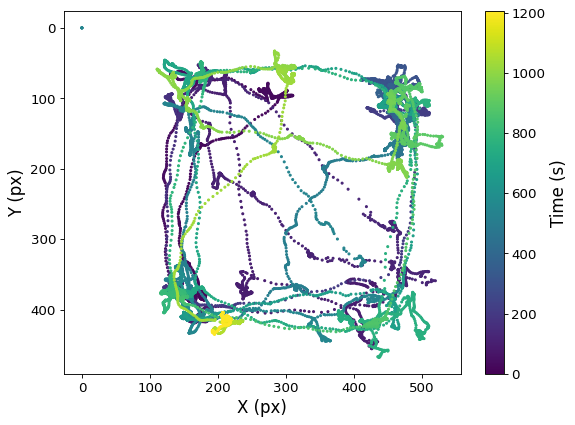

In [7]:
rat.Trajectory(df_example, bodyPartTraj='snout', fontsize =15)
# the points in the coordinates (0,0) are measurement errors from the Plexon tracking system.

In case you want to use the functions in loop, the DataFrames must be stored inside a list

In [8]:
data_day1 = [df1_1,df2_1,df3_1,df4_1,df5_1,df6_1]
data_day2 = [df1_2,df2_2,df3_2,df4_2,df5_2,df6_2]
data_day3 = [df1_3,df2_3,df3_3,df4_3,df5_3,df6_3]

if you want to plot all data at once (for trajectory or heatmap). DataFrames must be concatenated.

In [9]:
day_1 = data_day1[0]
day_2 = data_day2[0]
day_3 = data_day3[0]

for i in range(1,len(data_day1)):
    day_1 = day_1.append(data_day1[i][2:],ignore_index=True)
    day_2 = day_2.append(data_day2[i][2:],ignore_index=True)
    day_3 = day_3.append(data_day3[i][2:],ignore_index=True)

In [10]:
#@title Size of concatened data and single data
len(day_1),len(df1_1)

(217662, 36048)

## Graphics and metrics example <a name="graph"></a>

Trajectory(data, bodyPartTraj, bodyPartBox = None, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPartTraj : str
        Body part you want to plot the tracking.
    bodyPartBox : str
        The body part you want to use to estimate the limits of the environment, 
        usually the base of the tail is the most suitable for this determination.

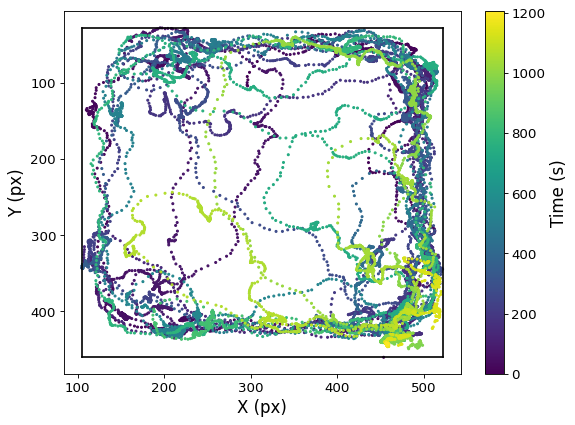

In [11]:
rat.Trajectory(df3_1, bodyPartTraj='tailBase', bodyPartBox='tailBase', fontsize =15)
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Heatmap(data, bodyPart, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPart : str
        Body part you want to plot the heatmap.
    cmapType : str, optional
        matplotlib colormap.
    hSize : int, optional
        Determine the figure height size (x).
    wSize : int, optional
        Determine the figure width size (y).
    bins : int, optional
        Determine the heatmap resolution, the higher the value, the higher the 
        resolution.
    vmax : int, optional
        Determine the heatmap scale.


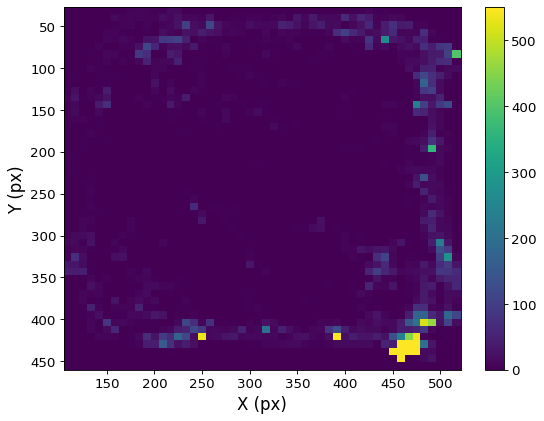

In [12]:
rat.Heatmap(df3_1, bodyPart = "tailBase", cmapType = 'viridis', 
            hSize=6, wSize =8, bins = 50, fontsize=15, vmax= 550)
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

In [13]:
#@title Rat distance
filter = .3

print('Rat - 3')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_1, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_2, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')
print('Distance:',"{:.2f}".format(rat.MotionMetrics(df3_3, "tailBase", filter=filter,  fps=30).Distance.sum()/100),'meters')

Rat - 3
Distance: 16.47 meters
Distance: 14.65 meters
Distance: 17.98 meters


HeadOrientation(data, step, head =  None, tail = None, **kwargs):

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    step : int
        Step used in the data, will use a data point for each 'x' steps. The 
        smaller the step, the greater the amount of arrows and the more difficult 
        the interpretation.
    head : str
        Head coordinates to create the arrow. You can use data referring to another
        part of the body that you want to have as a reference for the line that will
        create the arrow. The angulation will be based on the arrow.
    tail : str
        Tail coordinates to create the arrow. You can use data referring to another
        part of the body that you want to have as a reference for the line that will
        create the arrow. The angulation will be based on the arrow.
    arrow_color : str, optional
        Determines the arrow color.

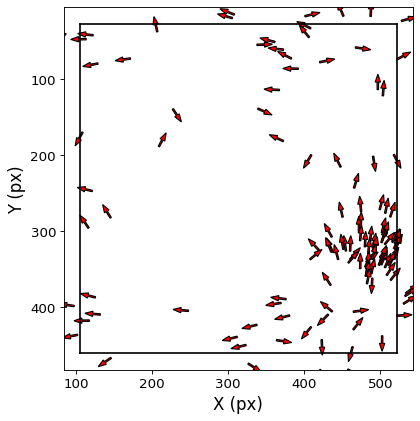

In [14]:
rat.HeadOrientation(df3_1, step = 267, head = "nose", tail  = "tailBase", arrow_color = 'red')
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Determining fields positions x and y (in pixels)

In [15]:
area = {'rect1': [1,0  ,0  ,0 ,135,50,50,375],
        'rect2': [1,0  ,0  ,0 ,435,50,50,375]}

Creating the fields

FieldDetermination(Fields=1,plot=False,**kwargs):

    Parameters
    ----------
    posit : dict, optional
        A dictionary to pass objects with directions and not need to use input. It
        must contain a cache and 8 dice ('objt_type','center_x','center_y', 'radius',
        'a_x', 'a_y' , 'height', 'width'), 'obj_type' must be 0 or 1 (0 = circle and 
        1 = rectangle). An example of this dictionary is in Section examples.
    plot : bool, optional
        Plot of objects created for ease of use. If you have difficulty in positioning 
        the areas, this parameter will plot the graph where the areas were positioned. 
        It needs to receive the DataFrame of the data and the part of the body that will
        be used to determine the limits of the environment (usually the tail).
    data : pandas DataFrame, optional
        The input tracking data.
    bodyPartBox : str, optional
        The body part you want to use to estimate the limits of the environment, 
        usually the base of the tail is the most suitable for this determination.

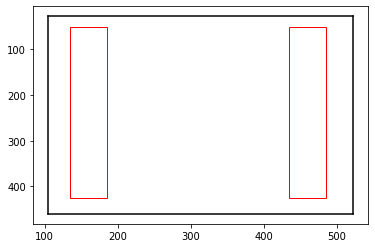

In [16]:
obj = rat.FieldDetermination(posit = area,plot=True,data=df3_1,bodyPartBox='tailBase')
rat_code = ['R1D1','R2D1','R3D1','R4D1','R5D1','R6D1']
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

Calculating the animal interaction with each field created.

PlotInteraction(interactions, **kwargs)

    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bodyPart : str
        Body part you want use as reference.
    fields : pandas DataFrame
        The DataFrame with the coordinates of the created fields (output of FieldDetermination()).

In [17]:
interactions = rat.Interaction(df3_1,'nose',obj)
interactions.T
# the terms passed in the function in quotes must be the same as in the DataFrame (Input Examples section)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221
start,0,-0.0333333,0.133333,1.7,2.93333,3.5,5.03333,5.2,20.7,21.1,24,24.3333,25.4,26.4667,26.6,26.6333,30.1333,30.9667,31.2333,31.4667,31.7333,32.0667,32.1,32.7,33.2,34.6333,34.8333,58.5333,59.0333,60.7333,60.7667,65.3667,65.8333,66.7667,66.9667,68.4667,69.1667,69.5,70,70.2,...,741.267,746.333,746.5,747.233,747.933,748,748.1,749.3,749.833,750.033,750.6,754.167,754.233,754.5,754.567,754.833,754.867,754.9,754.933,754.967,755.033,755.267,755.767,781.067,782.2,783,783.633,785.233,792.333,792.5,991.5,992.667,993.033,993.333,1003.5,1003.7,1012.33,1013.5,1013.57,1015.23
end,-0.0333333,0.133333,1.7,2.93333,3.5,5.03333,5.2,20.7,21.1,24,24.3333,25.4,26.4667,26.6,26.6333,30.1333,30.9667,31.2333,31.4667,31.7333,32.0667,32.1,32.7,33.2,34.6333,34.8333,58.5333,59.0333,60.7333,60.7667,65.3667,65.8333,66.7667,66.9667,68.4667,69.1667,69.5,70,70.2,70.3,...,746.333,746.5,747.233,747.933,748,748.1,749.3,749.833,750.033,750.6,754.167,754.233,754.5,754.567,754.833,754.867,754.9,754.933,754.967,755.033,755.267,755.767,781.067,782.2,783,783.633,785.233,792.333,792.5,991.5,992.667,993.033,993.333,1003.5,1003.7,1012.33,1013.5,1013.57,1015.23,1204.3
obj,0,1,2,0,2,0,2,0,1,0,1,0,1,0,1,0,1,2,1,2,0,2,0,2,0,2,0,1,0,1,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,2,0,2,0,2,0,2,0,1,0,1,0,1,0


Interactions plot

PlotInteraction(interactions, **kwargs):
```
Parameters
----------
  interactions : pandas DataFrame
      The DataFrame with the interactions of the fields (output of Interaction()). 


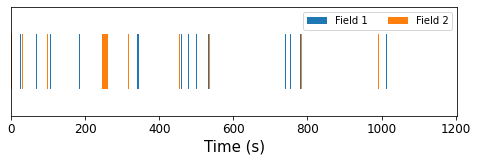

In [18]:
rat.PlotInteraction(interactions)

Metrics os each animal using Reports

Reports(df_list,list_name,bodypart,fields=None,filter=0.3,fps=30):

```
Parameters
----------
    df_list : list
        List with all DataFrames.
    list_name : list
        List with names of each data.
    bodypart : str
        Body part you want use as reference.
    fields : pandas DataFrame
        The DataFrame with the coordinates of the created fields (output of FieldDetermination()).   
    filter : float
        Threshold to remove motion artifacts. Adjust according to the tracking 
        quality and speed of what is moving.
    fps : int
        The recording frames per second.
```

In [19]:
df_report = rat.Reports(data_day1,list_name = rat_code,bodypart='nose',fields=obj)
df_report

,file,video time (min),dist (cm),speed (cm/s),field_1,time_field_1,field_2,time_field_2
0,R1D1,20.025000,2518.335994,2.095993,111.0,105.233333,125.0,85.133333
1,R2D1,20.741111,2629.041241,2.112585,164.0,110.566667,111.0,55.333333
2,R3D1,20.071667,2334.205607,1.938226,75.0,38.200000,40.0,32.133333
3,R4D1,20.020556,2449.761944,2.039372,126.0,79.533333,82.0,35.800000
4,R5D1,20.021111,2015.411763,1.677739,83.0,45.033333,90.0,54.866667
5,R6D1,20.039444,1699.114416,1.413142,32.0,17.100000,35.0,19.000000


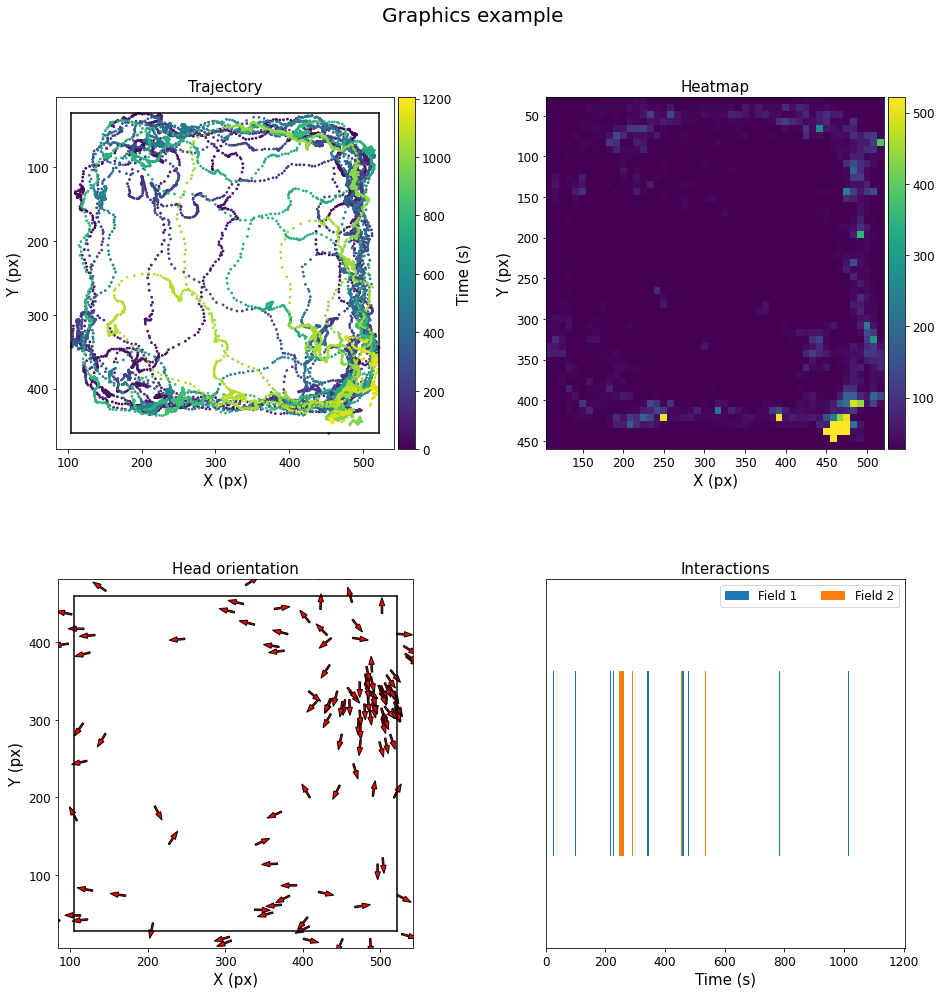

In [20]:
#@title Plot example
fig, axs = plt.subplots( 2, 2,figsize=(15,15))
fig.tight_layout(pad = 10)

fig.suptitle('Graphics example', fontsize = 20)
rat.Trajectory(df3_1, bodyPartTraj='tailBase', bodyPartBox='tailBase', fontsize =15, fig=fig, ax = axs[0][0], figureTitle = 'Trajectory')
rat.Heatmap(df3_1, "tailBase", cmapType = 'viridis', figureTitle = 'Heatmap', hSize=6, wSize =8, bins = 50, fontsize=15, vmax= 550,fig=fig, ax=axs[0][1])
rat.HeadOrientation(df3_1, 267, "nose", "tailBase", arrow_color = 'red', invertY = False,figureTitle = 'Head orientation', fig=fig, ax=axs[1][0])
rat.PlotInteraction(interactions, fig=fig, ax =axs[1][1],figureTitle = 'Interactions')

## Electophysiology example <a name="electophysiology"></a>

Load and read data (blackrock data organized in DataFrame)


Blackrock(data_path, freq): 

    Parameters
    ----------
    data_path : path
        Str with data path.
    freq : int
        Aquisition frequency.

In [22]:
data = '/content/PyRAT_dataset/electrophysiology_data.ns2'
dados = rat.Blackrock(data,1000)

In [23]:
dados.head()

,Time,Channel 1,Channel 2,Channel 3,Channel 4,Channel 5,Channel 6,Channel 7,Channel 8,Channel 9,Channel 10,Channel 11,Channel 12,Channel 13,Channel 14,Channel 15,Channel 16
0,0.000,-100.75,-100.0,-106.00,-99.50,-70.00,-80.00,-50.00,-90.00,-3.50,-45.75,2.00,-15.00,0.25,-2.00,-0.50,0.50
1,0.001,-103.00,-101.5,-108.25,-102.25,-65.75,-90.00,-56.50,-95.75,1.00,-41.25,2.75,-13.25,0.25,-9.75,0.00,0.50
2,0.002,-101.75,-100.0,-83.50,-101.50,-44.25,-58.50,-34.00,-74.00,10.75,-18.00,4.75,-14.50,0.50,-4.00,0.50,1.25
3,0.003,-96.75,-95.0,-70.75,-96.50,-50.00,-44.25,-30.00,-60.25,12.00,-14.50,5.50,-9.75,0.75,4.00,0.75,2.50
4,0.004,-76.25,-74.5,-67.50,-78.25,-66.25,-49.50,-43.25,-52.50,10.50,-24.50,7.00,-10.00,1.50,3.75,1.25,3.25


Data subsets

SignalSubset(sig_data,freq,fields, **kwargs):
    Parameters
    ----------
    sig_data : pandas DataFrame
        The input electrophysiology data organized with the channels in columns. We use the function
        LFP().
    freq : pandas DataFrame
        Frequency of electrophysiology data collection.
    fields : str
        Event time markers. Developed to use the output of the "Interaction()" function. But with 
        standardized data like the output of this function, it is possible to assemble the dataframe.
    start_time : list, optional
        Moment of the video you want subset to start, in seconds. If the variable is empty (None), 
        the entire video will be processed.
    end_time : list, optional
        Moment of the video you want subset to end, in seconds. If the variable is empty (None), 
        the entire video will be processed.

In [24]:
subset = rat.SignalSubset(dados,1000, fields = None, start_time = [60,100,160,220], end_time = [80,120,180,240])

Text(0, 0.5, 'uV')

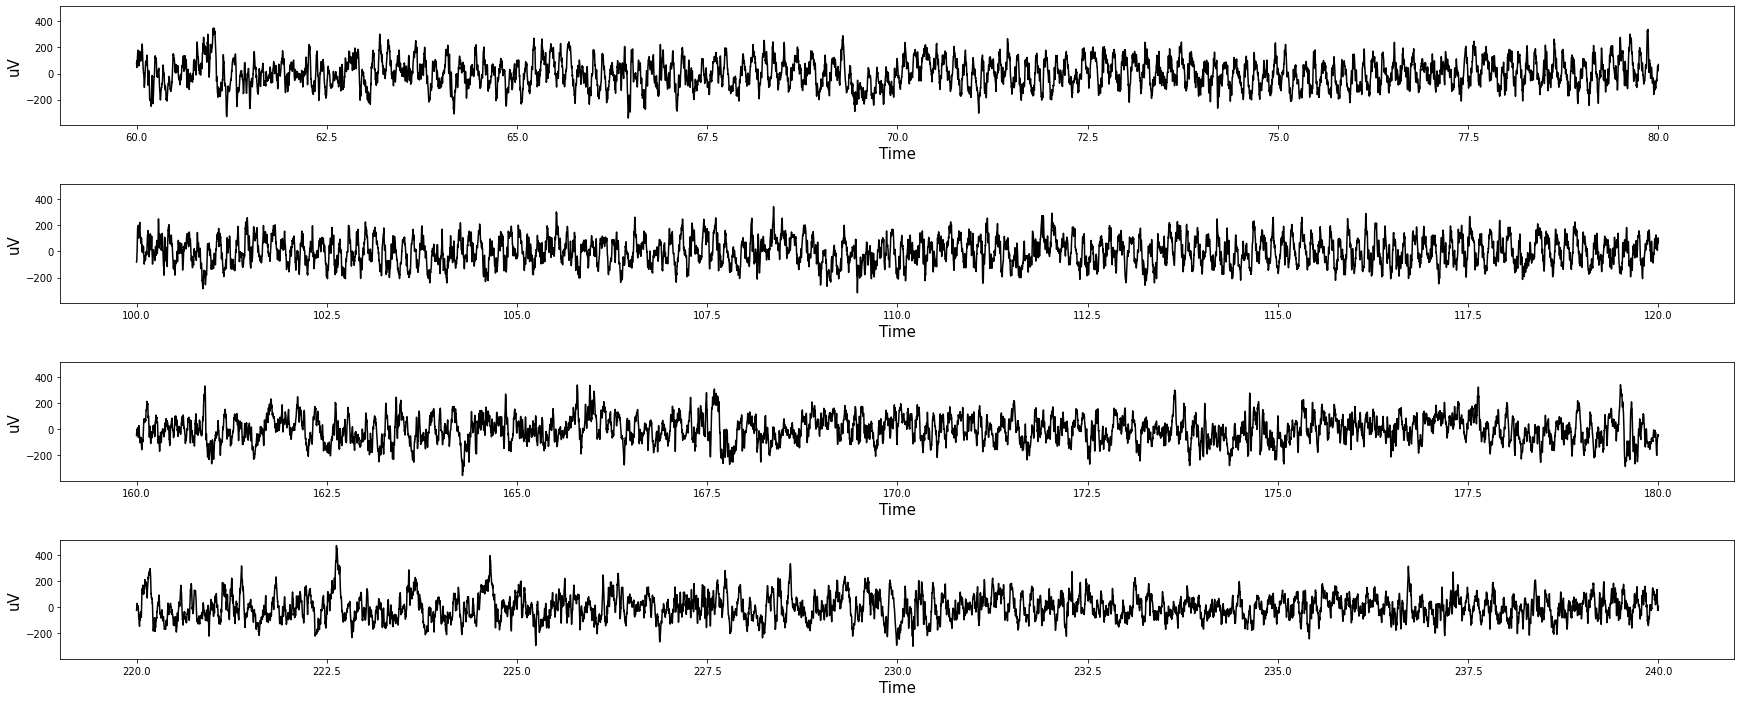

In [25]:
fig, axs = plt.subplots(4,1, figsize=(30, 12), facecolor='w', edgecolor='k', sharey=True)
fig.subplots_adjust(hspace = .5, wspace=.3)

axs = axs.ravel()

axs[0].plot(subset[0][0],subset[0][1], color = 'k')
axs[0].set_xlabel('Time', fontsize = 15)
axs[0].set_ylabel('uV', fontsize = 15)
axs[1].plot(subset[1][0],subset[1][1], color = 'k')
axs[1].set_xlabel('Time', fontsize = 15)
axs[1].set_ylabel('uV', fontsize = 15)
axs[2].plot(subset[2][0],subset[2][1], color = 'k')
axs[2].set_xlabel('Time', fontsize = 15)
axs[2].set_ylabel('uV', fontsize = 15)
axs[3].plot(subset[3][0],subset[3][1], color = 'k')
axs[3].set_xlabel('Time', fontsize = 15)
axs[3].set_ylabel('uV', fontsize = 15)

PSD

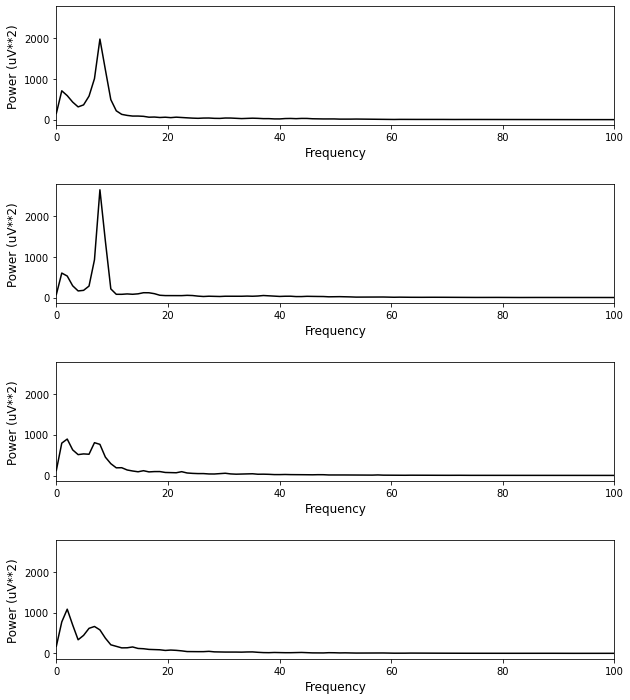

In [26]:
fig, axs = plt.subplots(4,1, figsize=(10, 12), facecolor='w', edgecolor='k', sharey = True)
fig.subplots_adjust(hspace = .5, wspace=.3)

axs = axs.ravel()

for i in range(4):
    f, Pxx_den = signal.welch(subset[i][1], 1000, nperseg=1024)
    axs[i].plot(f, Pxx_den, color = 'k')
    axs[i].set_xlim(0,100)
    axs[i].set_xlabel('Frequency', fontsize = 12)
    axs[i].set_ylabel('Power (uV**2)', fontsize = 12)

Spectogram

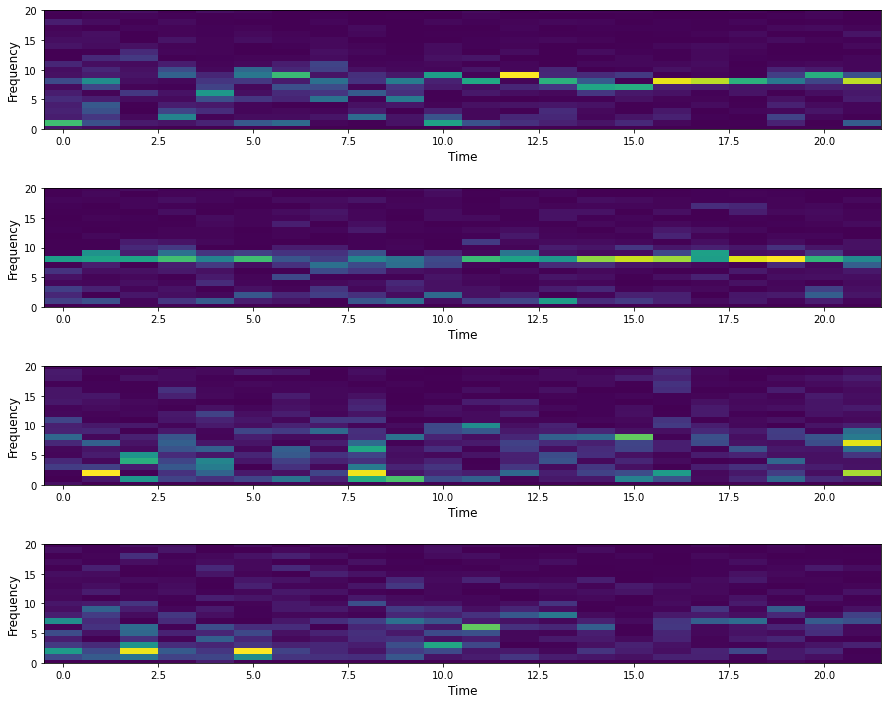

In [27]:
fig, axs = plt.subplots(4,1, figsize=(15, 12), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)

axs = axs.ravel()

for i in range(4):
    freq, times, spec = signal.spectrogram(subset[i][1], 1000,nperseg=1024)

    axs[i].imshow(spec,aspect='auto', cmap = 'viridis')
    fig.gca().invert_yaxis()
    axs[i].set_ylim(0,20)
    axs[i].set_xlabel('Time', fontsize = 12)
    axs[i].set_ylabel('Frequency', fontsize = 12)

## Classify Behavior example <a name="t-sne"></a>

Load the data from the DLC and filter according to the probability of getting it right.

In [28]:
data = pd.read_csv('/content/pyrat/docs/t-SNE.csv')

df = data.loc[np.where(data.iloc[:,([3,6, 9, 21])].values[2:].astype(np.float).mean(axis=1) > 0.6)]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 ClassifyBehavior(data, bp_1="snout",bp_2="ear_L", bp_3="ear_R", bp_4="tail", dimensions = 2,distance=28,**kwargs)   
    
    Parameters
    ----------
    data : pandas DataFrame
        The input tracking data.
    bp_1 : str
        Body part representing snout.
    bp_2 : str
        Body part representing left ear.
    bp_3 : str
        Body part representing right ear.
    bp_4 : str
        Body part representing tail.
    dimensions : int
        Dimension of the embedded space.
    distance : int
        The linkage distance threshold above which, clusters will not be merged.
    startIndex : int, optional
        Initial index.
    n_jobs : int, optional
        The number of parallel jobs to run for neighbors search.
    verbose : int, optional
        Verbosity level.
    perplexity : float, optional
        The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity.

    Returns
    -------
    cluster_labels : array
        Array with the cluster by frame.
    X_transformed : array
        Embedding of the training data in low-dimensional space.
    model : Obj
        AgglomerativeClustering model.
  

In [29]:
cluster_labels, bidimensional , model = rat.ClassifyBehavior(df,bp_1="nose",bp_2="earR", bp_3="earL", bp_4="tailBase", n_components = 2, distance_threshold = 28, startIndex=27000)

/usr/local/lib/python3.7/dist-packages/pyratlib/processing.py:1500: RuntimeWarning: invalid value encountered in true_divide
  distances2[:, i, j] = distances2[:, i, j]/np.max(distances2[:, i, j])


Scatter plot of data in two dimensions

Text(0.5, 1.0, 'Clusters')

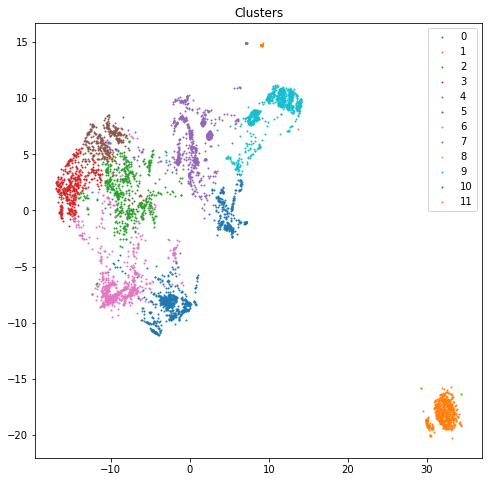

In [30]:
fig, ax = plt.subplots(figsize=(8,8))

for x in range(model.n_clusters_):
  sel = cluster_labels == x
  pontos = ax.scatter(bidimensional[sel,0], bidimensional[sel,1], label=str(x), s=1)

plt.legend()

plt.title('Clusters')

In [31]:
#@title Dendogram functions

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Dendrogram plot over clusters

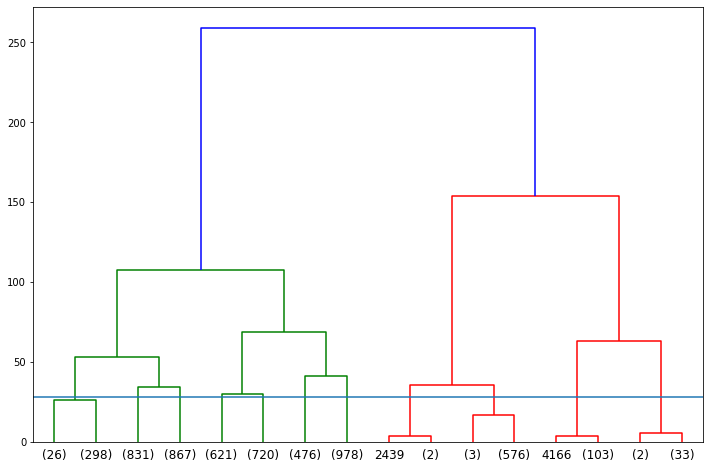

In [32]:
plt.figure(figsize=(12,8))
plot_dendrogram(model, truncate_mode='level', p=3)
plt.plot((0,1000), (28,28))